# Representing the aircraft solind and its weight force vector

The plan:

* Read a `struct` variable representing the aircraft external surface.<br/>
  Use the provided function `loadAircraftMAT`.
* Plot the faceted shape of the aircraft in a 3D space with the function `patch` and display the two reference frames $\mathcal{F}_\mathrm{E}$ and $\mathcal{F}_\mathrm{B}$.
* Plot the weight force vector and its components along the body axes, $\mathcal{F}_\mathrm{B}$.

## Initialize MATLAB

In [1]:
clearvars; close all; clc

% make the functions in this work directory available to matlab
current_dir = pwd;
addpath(genpath(current_dir));

% Set all interpreters to latex
list_factory = fieldnames(get(groot,'factory'));
index_interpreter = find(contains(list_factory,'Interpreter'));
for i = 1:length(index_interpreter)
    default_name = strrep(list_factory{index_interpreter(i)},'factory','default');
    set(groot, default_name,'latex');
end

## Load the 3D model

In [2]:
%% Load aircraft shape
shapeScaleFactor = 1.0;
shape = loadAircraftMAT('aircraft_pa24-250.mat', shapeScaleFactor);

## Draw the shapes

See:

* [function plotBodyE.m](https://github.com/agodemar/Flight_Dynamics_Book_Companion/blob/main/docs/Chapter_01/plotBodyE.m)
* [function plotEarthAxes.m](https://github.com/agodemar/Flight_Dynamics_Book_Companion/blob/main/docs/Chapter_01/plotEarthAxes.m)
* [function plotPoint3DHelperLines.m](https://github.com/agodemar/Flight_Dynamics_Book_Companion/blob/main/docs/Chapter_01/plotPoint3DHelperLines.m)

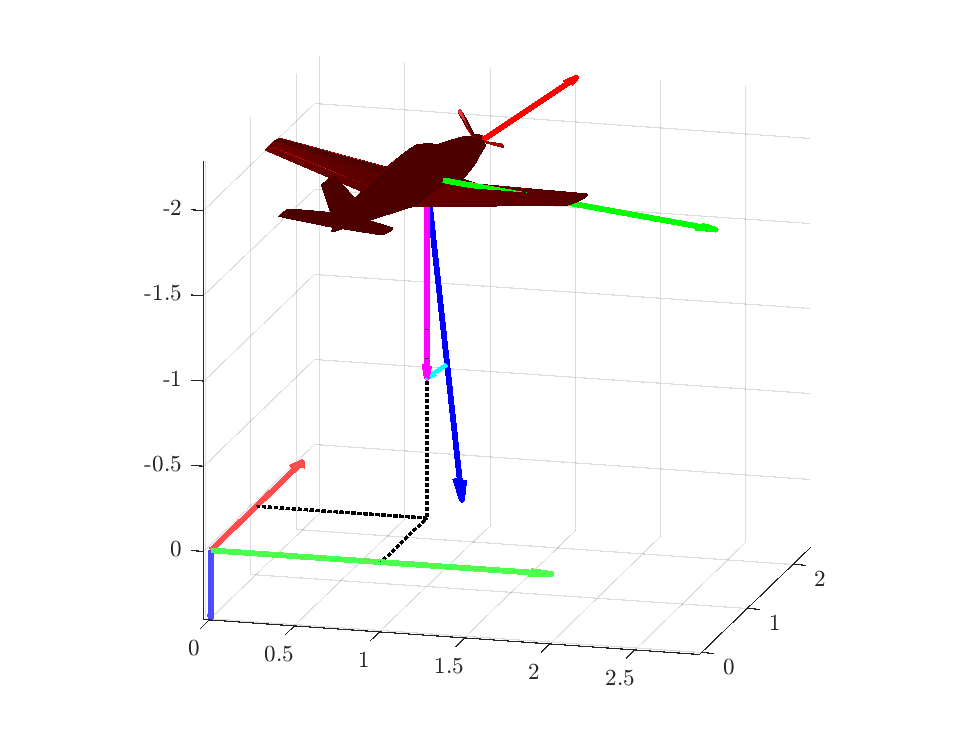

Tbe = 3x3 double
    0.9254    0.3368   -0.1736
   -0.3420    0.9397         0
    0.1632    0.0594    0.9848

vWeight_E = 3x1 double
           0
           0
       11772

vWeight_B = 3x1 double
1.0e+04 *

   -0.2044
         0
    1.1593

In [3]:
%% Setup the figure/scene
h_fig1 = figure(1);

grid on;
hold on;
light('Position',[1 0 -2],'Style','local');
% Trick to have Ze pointing downward and correct visualization
set(gca,'XDir','reverse');
set(gca,'ZDir','reverse');

%% Set the aircraft in place
% Posision in Earth axes
vXYZe = [1,1,-2];
% psi, theta, phi -> 'ZYX'
vEulerAngles = convang([20,10,0],'deg','rad');
% Observer point-of-view
theView = [105 15];
% body axes settings
bodyAxesOptions.show = true;
bodyAxesOptions.magX = 1.5;
bodyAxesOptions.magY = 2.0;
bodyAxesOptions.magZ = 2.0;
bodyAxesOptions.lineWidth = 2.5;
plotBodyE(h_fig1, shape, vXYZe, vEulerAngles, bodyAxesOptions, theView);

%% Plot Earth axes
hold on;
xMax = 2; % max([abs(vXYZe(1)),5]);
yMax = 2; % max([abs(vXYZe(2)),5]);
zMax = 0.2*xMax; % max([abs(max(vXYZe(1))),0.18*xMax]);
vXYZ0 = [0,0,0];
vExtent = [xMax,yMax,zMax];
plotEarthAxes(h_fig1, vXYZ0, vExtent);

%% draw CoG coordinate helper lines
hold on;
helperLinesOptions.lineColor = 'k';
helperLinesOptions.lineWidth = 1.5;
helperLinesOptions.lineStyle = ':';
plotPoint3DHelperLines(h_fig1, vXYZe, helperLinesOptions);

%% Mass data
mass = 1200.0; % kg
g = 9.81; % m/s^2

%% Euler angles
psi   = vEulerAngles(1);
theta = vEulerAngles(2);
phi   = vEulerAngles(3);

%% DCM 
% Transf. matrix from Earth- to body-axes 
Tbe = angle2dcm(psi, theta, phi, 'ZYX')
Teb = Tbe';
vWeight_E = [0;0;mass*g] % N
vWeight_B = Tbe*vWeight_E

%% Draw Weight pointing downward
hold on
scale_weight = 0.0001;
weightVecMag = scale_weight*mass*g;
quiver3( ...
    vXYZe(1),vXYZe(2),vXYZe(3), ...
    0, 0, weightVecMag, ...
    'AutoScale', 'off', 'Color', [1 0 1], ... % weight vector in magenta
    'LineWidth', 2.5 ...
);

%% Vector W_XB * i_B
% application point along z_B
pWZB_B = scale_weight.*[0;0;vWeight_B(3)];
pWZB_E = vXYZe' + Teb*pWZB_B;
% Vector W_XB * i_B (body-components)
vWeight_XB_B = scale_weight.*[vWeight_B(1);0;0];
% Vector W_XB * i_B (Earth-components)
vWeight_XB_E = Teb*vWeight_XB_B;
quiver3( ...
    pWZB_E(1), pWZB_E(2), pWZB_E(3), ...
    vWeight_XB_E(1), vWeight_XB_E(2), vWeight_XB_E(3), ...
    'AutoScale', 'off', 'Color', [0 1 1], ... % vector W_XB*i_B in cyan
    'LineWidth', 2.0, ...
    'MaxHeadSize', 4.0 ...
);